In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
epoch = 20000

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [4]:
w1 = tf.Variable(tf.zeros([784, 256]))
w2 = tf.Variable(tf.zeros([256, 256]))
w3 = tf.Variable(tf.zeros([256, 10]))

b1 = tf.Variable(tf.zeros([256]))
b2 = tf.Variable(tf.zeros([256]))
b3 = tf.Variable(tf.zeros([10]))

l1= tf.nn.softmax(tf.matmul(x, w1) + b1)
l2 = tf.nn.softmax(tf.matmul(l1, w2) + b2)
act = tf.matmul(l2, w3) + b3

In [5]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [6]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act, labels=y))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [7]:
pred = tf.equal(tf.argmax(act, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 64
data = len(x_train)

loss_list = []
acc_list = []

for epoch in range(50) :
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
    if(epoch +1) % 10 == 0 :
        pred, loss = sess.run([act, cross_entropy], feed_dict={x:x_test, y:y_test}) 
        acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(pred, axis=1))
        
        print('Epoch: %d\t loss: %1.4f\t accuracy: %1.4f' % (epoch+1, loss, acc))

        loss_list.append(1-acc)
        acc_list.append(acc)

Epoch: 10	 loss: 2.3013	 accuracy: 0.1135
Epoch: 20	 loss: 2.3013	 accuracy: 0.1135
Epoch: 30	 loss: 2.3013	 accuracy: 0.1135
Epoch: 40	 loss: 2.3013	 accuracy: 0.1135
Epoch: 50	 loss: 2.3013	 accuracy: 0.1135


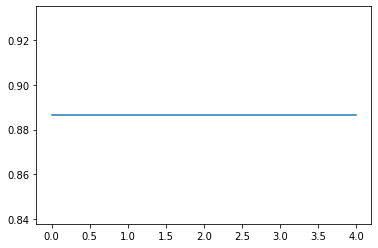

In [9]:
plt.plot(loss_list)

In [12]:
w4 = tf.Variable(tf.zeros([784, 256]))
w5 = tf.Variable(tf.zeros([256, 256]))
w6 = tf.Variable(tf.zeros([256, 10]))

b4 = tf.Variable(tf.zeros([256]))
b5 = tf.Variable(tf.zeros([256]))
b6 = tf.Variable(tf.zeros([10]))

l4= tf.nn.softmax(tf.matmul(x, w4) + b4)
l5 = tf.nn.softmax(tf.matmul(l4, w5) + b5)
act2 = tf.matmul(l5, w6) + b6

In [13]:
cross_entropy2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act2, labels=y))
train_step2 = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy2)

In [14]:
pred2 = tf.equal(tf.argmax(act2, 1), tf.argmax(y, 1))
accuracy2 = tf.reduce_mean(tf.cast(pred2, tf.float32))

In [15]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 1024
data = len(x_train)

loss_list2 = []
acc_list2 = []

for epoch in range(50) :
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
    if(epoch +1) % 10 == 0 :
        pred2, loss2 = sess.run([act2, cross_entropy2], feed_dict={x:x_test, y:y_test}) 
        acc2 = np.mean(np.argmax(y_test, axis=1) == np.argmax(pred2, axis=1))
        
        print('Epoch: %d\t loss: %1.4f\t accuracy: %1.4f' % (epoch+1, loss2, acc2))

        loss_list2.append(1-acc2)
        acc_list2.append(acc2)

Epoch: 10	 loss: 2.3026	 accuracy: 0.0980
Epoch: 20	 loss: 2.3026	 accuracy: 0.0980
Epoch: 30	 loss: 2.3026	 accuracy: 0.0980
Epoch: 40	 loss: 2.3026	 accuracy: 0.0980
Epoch: 50	 loss: 2.3026	 accuracy: 0.0980


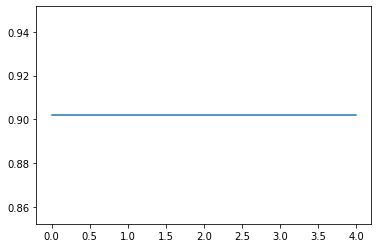

In [16]:
plt.plot(loss_list2)

In [17]:
w7 = tf.Variable(tf.zeros([784, 256]))
w8 = tf.Variable(tf.zeros([256, 256]))
w9 = tf.Variable(tf.zeros([256, 10]))

b7 = tf.Variable(tf.zeros([256]))
b8 = tf.Variable(tf.zeros([256]))
b9 = tf.Variable(tf.zeros([10]))

l7= tf.nn.softmax(tf.matmul(x, w7) + b7)
l8 = tf.nn.softmax(tf.matmul(l7, w8) + b8)
act9 = tf.matmul(l8, w9) + b9

In [18]:
cross_entropy3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act9, labels=y))
train_step3 = tf.train.AdamOptimizer(1e-2).minimize(cross_entropy3)

In [19]:
pred3 = tf.equal(tf.argmax(act9, 1), tf.argmax(y, 1))
accuracy3 = tf.reduce_mean(tf.cast(pred3, tf.float32))

In [20]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 64
data = len(x_train)

loss_list3 = []
acc_list3 = []

for epoch in range(50) :
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
    if(epoch +1) % 10 == 0 :
        pred3, loss3 = sess.run([act9, cross_entropy3], feed_dict={x:x_test, y:y_test}) 
        acc3 = np.mean(np.argmax(y_test, axis=1) == np.argmax(pred3, axis=1))
        
        print('Epoch: %d\t loss: %1.4f\t accuracy: %1.4f' % (epoch+1, loss3, acc3))

        loss_list3.append(1-acc3)
        acc_list3.append(acc3)

Epoch: 10	 loss: 2.3026	 accuracy: 0.0980
Epoch: 20	 loss: 2.3026	 accuracy: 0.0980
Epoch: 30	 loss: 2.3026	 accuracy: 0.0980
Epoch: 40	 loss: 2.3026	 accuracy: 0.0980
Epoch: 50	 loss: 2.3026	 accuracy: 0.0980


In [21]:
w10 = tf.Variable(tf.zeros([784, 256]))
w11 = tf.Variable(tf.zeros([256, 256]))
w12 = tf.Variable(tf.zeros([256, 10]))

b10 = tf.Variable(tf.zeros([256]))
b11 = tf.Variable(tf.zeros([256]))
b12 = tf.Variable(tf.zeros([10]))

l10= tf.nn.softmax(tf.matmul(x, w10) + b10)
l11 = tf.nn.softmax(tf.matmul(l10, w11) + b11)
act12 = tf.matmul(l11, w12) + b12

In [22]:
cross_entropy4 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act12, labels=y))
train_step4 = tf.train.AdamOptimizer(1e-2).minimize(cross_entropy4)

In [23]:
pred4 = tf.equal(tf.argmax(act12, 1), tf.argmax(y, 1))
accuracy4 = tf.reduce_mean(tf.cast(pred4, tf.float32))

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 1024
data = len(x_train)

loss_list4 = []
acc_list4 = []

for epoch in range(50) :
    for i in range(batch_size, data, batch_size):
        batch_x = x_train[i-batch_size:i]
        batch_y = y_train[i-batch_size:i]
        sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
    if(epoch +1) % 10 == 0 :
        pred4, loss4 = sess.run([act12, cross_entropy4], feed_dict={x:x_test, y:y_test}) 
        acc4 = np.mean(np.argmax(y_test, axis=1) == np.argmax(pred4, axis=1))
        
        print('Epoch: %d\t loss: %1.4f\t accuracy: %1.4f' % (epoch+1, loss4, acc4))

        loss_list4.append(1-acc4)
        acc_list4.append(acc4)

Epoch: 10	 loss: 2.3026	 accuracy: 0.0980
Epoch: 20	 loss: 2.3026	 accuracy: 0.0980
Epoch: 30	 loss: 2.3026	 accuracy: 0.0980
Epoch: 40	 loss: 2.3026	 accuracy: 0.0980
Epoch: 50	 loss: 2.3026	 accuracy: 0.0980


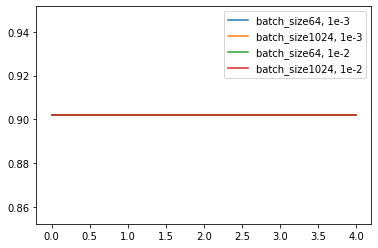

In [27]:
plt.plot(loss_list, label='batch_size64, 1e-3')
plt.plot(loss_list2, label='batch_size1024, 1e-3')
plt.plot(loss_list3, label='batch_size64, 1e-2')
plt.plot(loss_list4, label='batch_size1024, 1e-2')
plt.legend()